**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Loading Data**

In [ ]:
loan_df = pd.read_csv('/content/drive/MyDrive/Random Forest Classifier/loan_approval_dataset.csv')

**Understanding of data**

In [ ]:
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
loan_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
loan_df.shape

(4269, 13)

In [ ]:
loan_df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [ ]:
loan_df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

**Data Preprocessing and cleaning**

In [ ]:
loan_df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
loan_df.duplicated().sum()

0

In [ ]:
# Create 'total_assets_value' by summing asset-related columns
loan_df['total_assets_value'] = (loan_df[' residential_assets_value'] +
                            loan_df[' commercial_assets_value'] +
                            loan_df[' luxury_assets_value'] +
                            loan_df[' bank_asset_value'])

# Check the new column
print(loan_df[[' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', 'total_assets_value']].head())


    residential_assets_value   commercial_assets_value   luxury_assets_value  \
0                    2400000                  17600000              22700000   
1                    2700000                   2200000               8800000   
2                    7100000                   4500000              33300000   
3                   18200000                   3300000              23300000   
4                   12400000                   8200000              29400000   

    bank_asset_value  total_assets_value  
0            8000000            50700000  
1            3300000            17000000  
2           12800000            57700000  
3            7900000            52700000  
4            5000000            55000000  


In [ ]:
loan_df.drop('loan_id',axis=1,inplace=True)

In [ ]:
#now drop unnecessary ones
loan_df.drop([' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value'],axis=1,inplace=True)

In [ ]:
loan_df.shape

(4269, 9)

In [ ]:
le=LabelEncoder()
loan_df[' education']=le.fit_transform(loan_df[' education'])
loan_df[' self_employed']=le.fit_transform(loan_df[' self_employed'])
loan_df[' loan_status']=le.fit_transform(loan_df[' loan_status'])

In [40]:
loan_df.head(20)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets_value
0,2,0,0,9600000,29900000,12,778,0,50700000
1,0,1,1,4100000,12200000,8,417,1,17000000
2,3,0,0,9100000,29700000,20,506,1,57700000
3,3,0,0,8200000,30700000,8,467,1,52700000
4,5,1,1,9800000,24200000,20,382,1,55000000
5,0,0,1,4800000,13500000,10,319,1,33900000
6,5,0,0,8700000,33000000,4,678,0,70800000
7,2,0,1,5700000,15000000,20,382,1,36700000
8,0,0,1,800000,2200000,20,782,0,5500000
9,5,1,0,1100000,4300000,10,388,1,9500000


0.   approved
1.   not approved


0.   Graduate
1.   un-graduate


0.   No
1.   Yes

**EDA**

In [ ]:
#Distribution of loan status
loan_df[' loan_status'].value_counts()

,count
loan_status,
0,2656
1,1613


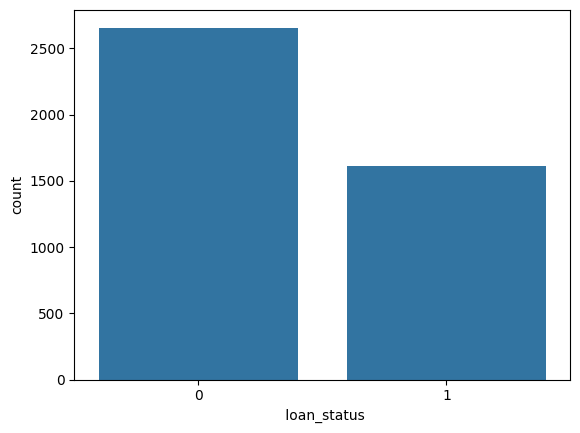

In [ ]:
#countplot for loan status
sns.countplot(x=' loan_status',data=loan_df)
plt.show()

In [ ]:
#No.of dependents column
loan_df[' no_of_dependents'].value_counts()

,count
no_of_dependents,
4,752
3,727
0,712
2,708
1,697
5,673


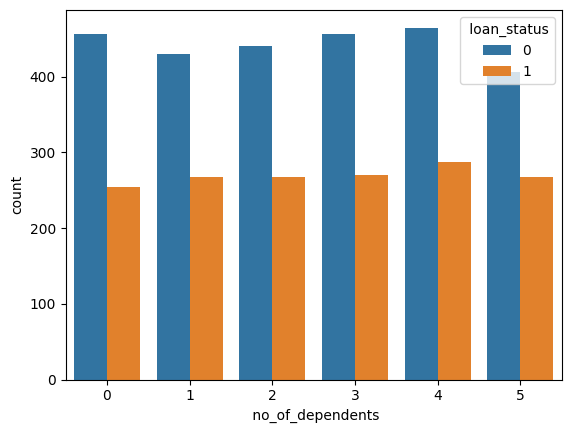

In [ ]:
#relationship of no of dependents with loan status
sns.countplot(x=' no_of_dependents',hue=' loan_status',data=loan_df)
plt.show()

In [ ]:
#Analyzing education column
loan_df[' education'].value_counts()

,count
education,
0,2144
1,2125


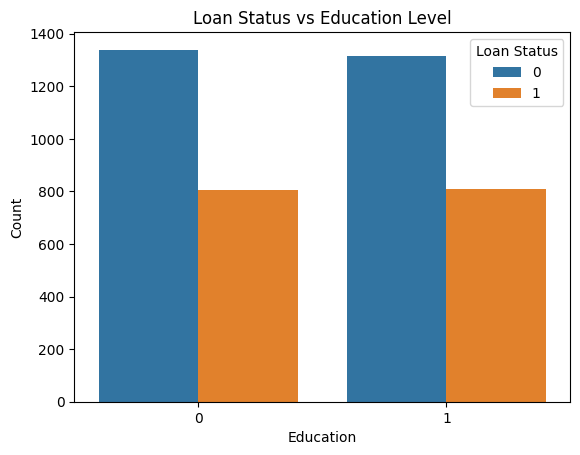

In [ ]:
# Grouped bar plot for 'education' and 'loan_status'
sns.countplot(data=loan_df, x=' education', hue=' loan_status')
plt.title('Loan Status vs Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [ ]:
#analyzing self employed column
loan_df[' self_employed'].value_counts()

,count
self_employed,
1,2150
0,2119


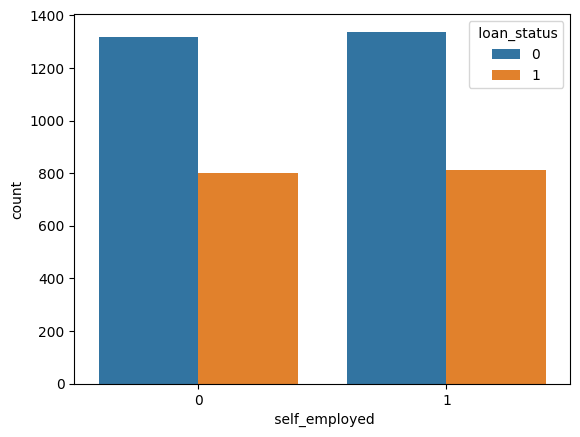

In [ ]:
#countplot for self employed and loan_status
sns.countplot(x=' self_employed',hue=' loan_status',data=loan_df)
plt.show()

In [ ]:
#analyzing income annum column
loan_df[' income_annum'].value_counts()

,count
income_annum,
7000000,62
4100000,59
7600000,57
4700000,56
6900000,55
...,...
3600000,33
3400000,33
9300000,33


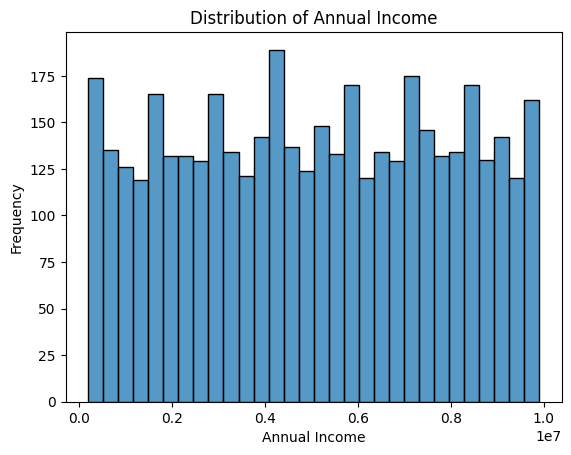

In [ ]:
#histogram for income annum column
sns.histplot(loan_df[' income_annum'], bins=30, edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

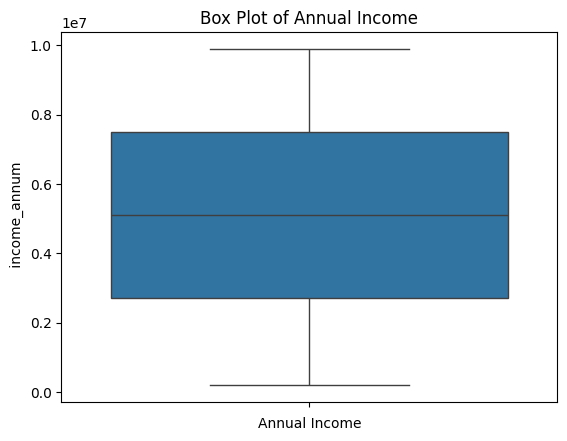

In [ ]:
#box plot for income annum
sns.boxplot(loan_df[' income_annum'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

In [ ]:
#correlation between target and features
loan_df.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets_value
no_of_dependents,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.018114,0.005289
education,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,0.004918,-0.009513
self_employed,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,-0.000345,0.000023
income_annum,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.015189,0.931845
loan_amount,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,-0.016150,0.867067
loan_term,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.113036,0.010131
cibil_score,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.770518,-0.023433
loan_status,0.018114,0.004918,-0.000345,0.015189,-0.016150,0.113036,-0.770518,1.000000,0.011281
total_assets_value,0.005289,-0.009513,0.000023,0.931845,0.867067,0.010131,-0.023433,0.011281,1.000000


<Axes: >

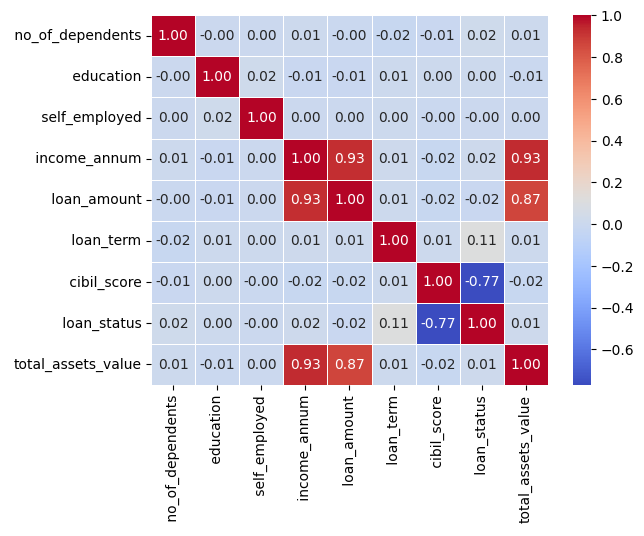

In [ ]:
#heatmap for correlation between columns
sns.heatmap(loan_df.corr(),annot=True,cmap='coolwarm', linewidths=0.5, fmt=".2f")

**Train Test Split**

In [ ]:
#seperating independent and dependent features
X=loan_df.drop(' loan_status',axis=1)
y=loan_df[' loan_status']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
rfc=RandomForestClassifier(n_estimators=199)
model_rfc=rfc.fit(X_train,y_train)

In [ ]:
pred_rfc=model_rfc.predict(X_test)

**Evaluating the Model**

In [ ]:
#classification report
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       776
           1       0.98      0.98      0.98       505

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [ ]:
#Confusion Matrix
cm=pd.DataFrame(confusion_matrix(y_test,pred_rfc),index="0 1".split(),columns="0 1".split())
cm

,0,1
0,764,12
1,12,493


In [ ]:
#Accuracy
print("Accuracy is :",accuracy_score(y_test,pred_rfc)*100,'%')

Accuracy is : 98.12646370023418 %


In [ ]:
import pickle
pickle.dump(model_rfc,open('model.pkl','wb'))

In [39]:
pickle.dump(le, open('le_encoder.pkl', 'wb'))